# Vector Data Analysis
## This notebook represents working with vector data in python

Vector data is usually a tabular data coupled with location information. e.g. Data of all states in India ( This file will have some attribute data about states such as name, population, etc. along with one column of geometry containing location information). Vector data geometry can be divided in 3 major types: 

1. Point Geometry  

    Point Geometry consists of discrete location information such as *latitude, longitude* which can help us to identify the exact location of given feature. 

    e.g - Location of bus stop, location of user, etc.

2. Line Geometry

    Line Geometry is collection of multiple *latitude, longitude* in an array which represents continuous path.

    e.g. - Centreline of road, River, Path created by user, etc.

3. Polygon Geometry 

    Polygon Geometry is collection of multiple *latitude, longitude* in an array which represents continuous enclosed area.

    e.g. - Geometry of State, polygon of building, etc.
    
## Loading Data

First step is to load the Data in to python, this data can be a file available on machine, data stored in database, or file hosted on some server

### 1. Loading Shapefile 

Loading all countries geometry (src: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/)

In [2]:
#Using geopandas to work with data
import geopandas as gpd
#Using Matplotlib for visualisation
import matplotlib
%matplotlib inline
c

In [3]:
#load it as a pandas dataframe with understanding on geometrical data
countries = gpd.read_file('../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

countries

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,마카오,Macau,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
251,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,애시모어 카르티에 제도,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
252,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,바호 누에보 뱅크,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
253,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,세라냐 뱅크,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


<AxesSubplot:>

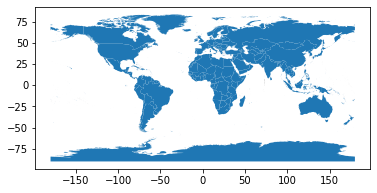

In [4]:
countries.plot()


#### Understanding GeoDataFrame

GeoDataFrame will always have <b>geometry</b> column, apart from that other columns will act as metadata. 

So `geopandas` = `pandas` + `geometry` 

Each column except geometry in the geopandas is of type `pandas.Series` , geometry is treated as `pandas.GeoSeries`

In [9]:
print(type(countries.geometry))
print(type(countries.scalerank))

<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


Each geometry is a `shapely` Shape, thus we can perform all shapely methods on these geometries

Checkout all available methods here https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships

In [10]:
countries.geometry

0      MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1      MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2      MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3      POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4      MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
                             ...                        
250    MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...
251    POLYGON ((123.59702 -12.42832, 123.59775 -12.4...
252    POLYGON ((-79.98929 15.79495, -79.98782 15.796...
253    POLYGON ((-78.63707 15.86209, -78.64041 15.864...
254    POLYGON ((117.75389 15.15437, 117.75569 15.151...
Name: geometry, Length: 255, dtype: geometry

In [11]:
countries.geometry.centroid

/var/folders/53/tf009w352j91l9x93jkww48h0000gn/T/ipykernel_83118/1053774104.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries.geometry.centroid


0       POINT (117.27043 -2.22296)
1        POINT (109.69887 3.79239)
2      POINT (-71.36437 -37.74361)
3      POINT (-64.68475 -16.70688)
4       POINT (-74.37806 -9.15439)
                  ...             
250     POINT (113.55020 22.15779)
251    POINT (123.58637 -12.43258)
252     POINT (-79.98787 15.79501)
253     POINT (-78.63812 15.86446)
254     POINT (117.75381 15.15211)
Length: 255, dtype: geometry

### 2. Loading Geojson 

Loading local geojson file 

In [13]:
rivers = gpd.read_file('../data/rivers.geojson')
rivers

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,...,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,...,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,...,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,2049Lake Centerline,10.0,Lake Centerline,Ohau,None,2049,None,7.2,Ohau,8.2,...,None,None,None,None,None,None,None,4,1159129657,"MULTILINESTRING ((170.19260 -44.34343, 170.200..."
1451,219River,6.0,River,Po,None,219,Version 4 edit,5.0,Po,6.0,...,Pad,Rio Pó,По,Po,Po Nehri,Sông Po,波河,4,1159129663,"MULTILINESTRING ((7.64746 44.83906, 7.61408 44..."
1452,178River,5.0,River,Loire,None,178000,Changed in 2.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129671,GEOMETRYCOLLECTION EMPTY
1453,178River,5.0,River,Loire,None,178,Changed in 4.0,4.7,Loire,5.7,...,Loara,Rio Loire,Луара,Loire,Loire Nehri,Sông Loire,卢瓦尔河,4,1159129677,"MULTILINESTRING ((3.07819 46.98509, 3.07171 46..."


### 3. Loading PostgreSQL

Loading data from database

In [14]:
import psycopg2 

con = psycopg2.connect(database="postgres", user="postgres", password="postgres",
    host="localhost")

sql = "SELECT * FROM public.places"
places = gpd.read_postgis(sql, con, geom_col='geom' )
places

,id,geom,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,...,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id
0,1,POINT (-57.84000 -34.48000),10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,...,Colonia del Sacramento,コロニア・デル・サクラメント,콜로니아델사크라멘토,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,4,1159112629
1,2,POINT (-56.90100 -33.54400),10,1,8,Admin-1 capital,Trinidad,None,None,0,...,Trinidad,トリニダ,트리니다드,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,4,1159112647
2,3,POINT (-58.30400 -33.13900),10,1,8,Admin-1 capital,Fray Bentos,None,None,0,...,Fray Bentos,フライ・ベントス,프라이벤토스,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,4,1159112663
3,4,POINT (-56.28400 -34.53800),10,1,8,Admin-1 capital,Canelones,None,None,0,...,Canelones,カネローネス,카넬로네스,Canelones,Canelones,Canelones,Canelones,Canelones,4,1159112679
4,5,POINT (-56.21500 -34.09900),10,1,8,Admin-1 capital,Florida,None,None,0,...,Florida,フロリダ,플로리다,Florida,Florida,Florida,Flordia,Florida,4,1159112703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,7323,POINT (174.91231 -41.20374),8,10,8,Populated place,Lower Hutt,None,None,0,...,Lower Hutt,ローワーハット,로어헛,Lower Hutt,Lower Hutt,Lower Hutt,Lower Hutt,Hạ Hutt,4,1159151705
7339,7324,POINT (174.99893 -40.90344),8,10,8,Populated place,Paraparaumu,None,None,0,...,Paraparaumu,None,None,Paraparaumu,Paraparaumu,Paraparaumu,None,None,4,1159151707
7340,7325,POINT (174.85235 -41.12189),8,10,8,Populated place,Porirua,None,None,0,...,Porirua,ポリルア市,포리루아,Porirua,Porirua,Porirua,Poirua,Porirua,4,1159151709
7341,7326,POINT (175.58532 -37.13842),8,10,8,Populated place,Thames,None,None,0,...,None,テムズ,None,Thames,Thames,None,None,None,4,1159151711


### 4. Import CSV 

Assuming that CSV has a geometry column that contains geometery in WKT format

In [60]:
from shapely import wkt

airport = gpd.read_file('../data/airport.csv')

airport['geometry'] = airport['geom'].apply(wkt.loads)
del airport['geom']
airport


,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,,Q7399709,,,,Sahnewal Airport,,,,सहेनवाल हवाई अड्डा,,,,,,,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,,Q7555807,,,,Solapur Airport,,,,शोलापुर विमानक्षेत्र,,,,ソーラープル空港,,,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,,Q598231,,বিরসা মুন্ডা বিমানবন্দর,,Birsa Munda Airport,Aeropuerto Birsa Munda,,,बिरसा मुंडा हवाई-अड्डा,,,,ビルサ・ムンダ空港,,,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.000,,Q622296,مطار الأحواز الدولي,,,Ahwaz International Airport,Aeropuerto Internacional de Ahvaz,Aéroport d'Ahvaz,,,,Bandar Udara Internasional Ahwaz,,アフヴァーズ空港,,Ahwaz Airport,Port lotniczy Ahwaz,,,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,,Q2247561,,,,Gwalior Airport,,,,ग्वालियर विमानक्षेत्र,,,,グワーリヤル空港,,,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,Airport,major,Madrid Barajas,MAD,terminal,LEMD,MAD,http://en.wikipedia.org/wiki/Madrid_Barajas_In...,150.000,,Q166276,مطار مدريد باراخاس الدولي,,Flughafen Adolfo Suárez Madrid-Barajas,Adolfo Suárez Madrid–Barajas Airport,Aeropuerto de Adolfo Suárez Madrid-Barajas,aéroport international de Adolfo Suárez Madrid...,Διεθνές Αεροδρόμιο Μαδρίτης Μπαράχας,बाराजास हवाई अड्डा,Adolfo Suárez Madrid-Barajasi repülőtér,Bandar Udara Internasional Barajas Madrid,Aeroporto di Adolfo Suárez Madrid-Barajas,マドリード・バラハス国際空港,마드리드 바라하스 국제공항,Luchthaven Adolfo Suárez Madrid-Barajas,Port lotniczy Madryt-Barajas,Aeroporto de Adolfo Suárez Madrid-Barajas,Барахас,Madrid-Barajas flygplats,Madrid Barajas Uluslararası Havalimanı,Sân bay quốc tế Madrid Barajas,马德里－巴拉哈斯机场,4,1159127851,POINT (-3.56903 40.46813)
887,2,Airport,major,Luis Muñoz Marin,SJU,terminal,TJSJ,SJU,http://en.wikipedia.org/wiki/Luis_Mu%C3%B1oz_M...,150.000,,Q1360523,مطار لويس مارين مونيوز,,Flughafen San Juan,Luis Muñoz Marín International Airport,Aeropuerto Internacional Luis Muñoz Marín,aéroport international Luis-Muñoz-Marín,,,,Bandar Udara Internasional Luis Muñoz Marín,Aeroporto di San Juan-Isla Verde,ルイス・ムニョス・マリン国際空港,,Luis Muñoz Marín International Airport,Port lotniczy Luis Muñoz Marín,Aeroporto Internacional Luis Muñoz Marin,Каролина,Luis Muñoz Marín International Airport,,Sân bay quốc tế Luis Muñoz Marín,路易斯·穆尼奥斯·马林国际机场,4,1159127861,POINT (-66.00423 18.43808)
888,2,Airport,major,Arlanda,ARN,terminal,ESSA,ARN,http://en.wikipedia.org/wiki/Stockholm-Arlanda...,150.000,,Q223499,مطار ستوكهولم أرلاندا,স্টকহোল্ম আর্লান্দা বিমানবন্দর,Flughafen Stockholm-Arlanda,Stockholm Arlanda Airport,Aeropuerto de Estocolmo-Arlanda,aéroport de Stockholm-Arlanda,Διεθνές Αεροδρόμιο Αρλάντα,,Stockholm-Arlanda repülőtér,Bandar Udara Stockholm Arlanda,Aeroporto di Stoccolma-Arlanda,ストックホルム・アーランダ空港,스톡홀름 알란다 공항,Luchthaven Stockholm-Arlanda,Port lotniczy Sztokholm-Arlanda,Aeroporto de Arlanda,Стокгольм-Арланда,Stockholm Arlanda Airport,Stockholm-Arlanda Havalimanı,Sân bay Stockholm-Arlanda,斯德哥爾摩－阿蘭達機場,4,1159127877,POINT (17.93073 59.65112)
889,2,Airport,major,Soekarno-Hatta I

### 5. Creating geometry On the fly

Create geodataframe from csv having columns as longitude and latitude, which will be used further to create geometery on the fly

In [16]:
import pandas as pd
df = pd.read_csv('../data/stadium.csv')
stadium = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
stadium

,name,capacity,lat,lon,geometry
0,Eden Gardens,66349,22.564608,88.341071,POINT (88.34107 22.56461)
1,Wankhede Stadium,33108,18.938853,72.823570,POINT (72.82357 18.93885)
2,Narendra Modi Stadium,132000,18.984750,73.119733,POINT (73.11973 18.98475)
3,M. A. Chidambaram Stadium,54000,13.062866,80.278154,POINT (80.27815 13.06287)
4,Arun Jaitley Stadium,41820,28.637923,77.240979,POINT (77.24098 28.63792)


### 6. Create Geodataframe manually 

User can also create Geodataframe in the notebook, using their own data

In [31]:
from shapely.geometry import Point

police = gpd.GeoDataFrame({
    'geometry': [Point(1, 1), Point(2, 2),Point(2, 1),Point(1, 2),Point(1.5, 2)],
    'id': [1, 2,3,4,5],
    'criminals': [12,34,112,41, 212]})
police

,geometry,id,criminals
0,POINT (1.00000 1.00000),1,12
1,POINT (2.00000 2.00000),2,34
2,POINT (2.00000 1.00000),3,112
3,POINT (1.00000 2.00000),4,41
4,POINT (1.50000 2.00000),5,212


## More about shapely

### How to create geometery

In [13]:
from shapely.geometry import Polygon,Point,LineString
Pt = Point(10,10)
line = LineString([(0,0),(0,3),(3,0)])
poly = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])



POINT (10 10)
LINESTRING (0 0, 0 3, 3 0)
POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))


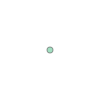

In [22]:
Pt

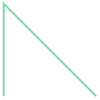

In [17]:
line

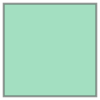

In [18]:
poly

### Geospatial analysis

In [19]:
poly.touches(line)

True

In [20]:
poly.contains(Pt)

False

In [21]:
Pt.buffer(20).contains(poly)

True

### Peoperties of shape


In [23]:
poly.area

1.0

In [24]:
line.bounds

(0.0, 0.0, 3.0, 3.0)

In [28]:
line.length

7.242640687119285

## More about Fiona 

Fiona is a python interface of GDAL/OGR library, Geopandas is a more easy to user wrapper

In [43]:
import fiona

In [46]:
places = fiona.open('../data/ne_10m_populated_places/ne_10m_populated_places.shp')
places

<open Collection '../data/ne_10m_populated_places/ne_10m_populated_places.shp:ne_10m_populated_places', mode 'r' at 0x7fd73a4b2730>

In [47]:
places.driver

'ESRI Shapefile'

In [48]:
places.schema

{'properties': OrderedDict([('SCALERANK', 'int:4'),
              ('NATSCALE', 'int:4'),
              ('LABELRANK', 'int:4'),
              ('FEATURECLA', 'str:50'),
              ('NAME', 'str:100'),
              ('NAMEPAR', 'str:254'),
              ('NAMEALT', 'str:254'),
              ('DIFFASCII', 'int:4'),
              ('NAMEASCII', 'str:100'),
              ('ADM0CAP', 'float:19.11'),
              ('CAPIN', 'str:15'),
              ('WORLDCITY', 'float:19.11'),
              ('MEGACITY', 'int:4'),
              ('SOV0NAME', 'str:100'),
              ('SOV_A3', 'str:3'),
              ('ADM0NAME', 'str:50'),
              ('ADM0_A3', 'str:3'),
              ('ADM1NAME', 'str:50'),
              ('ISO_A2', 'str:5'),
              ('NOTE', 'str:254'),
              ('LATITUDE', 'float:19.11'),
              ('LONGITUDE', 'float:19.11'),
              ('CHANGED', 'float:19.11'),
              ('NAMEDIFF', 'int:4'),
              ('DIFFNOTE', 'str:254'),
              ('POP_MAX',

In [49]:
places.crs

{'init': 'epsg:4326'}

In [50]:
len(places)

7343

## Playing with GeoDataFrame

### Coordinate system 

Unline `shapely`, `geopandas` understands crs

What CRS are important? 
- CRS will make sense out of your data such as whether the units are degrees/meters
- Bringing all data in same CRS allows us to do spatial analysis with data 


To check CRS of GeoDataframe


In [29]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can also set CRS for the GeoDataFrame which has no default CRS

In [32]:
We can also set CRS for the GeoDataFrame which has no default CRS

In [36]:
police = police.set_crs('epsg:4326')
police.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can also convert GeoDataFrame from one CRS to another

In [38]:
police.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
police_3857 = police.to_crs(3857)

In [41]:
police_3857

,geometry,id,criminals
0,POINT (111319.491 111325.143),1,12
1,POINT (222638.982 222684.209),2,34
2,POINT (222638.982 111325.143),3,112
3,POINT (111319.491 222684.209),4,41
4,POINT (166979.236 222684.209),5,212


In [42]:
police_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Merging 

1. Atrribute based merge

In [18]:
neighbor = pd.DataFrame({
    'id': [1, 2,3,4,5],
    'neighbor_id': ['a1', 'a2','a3','c4','d5'],
    'neighbor_name': ['andy','julio','true','skewd', 'tauras']})
neighbor

,id,neighbor_id,neighbor_name
0,1,a1,andy
1,2,a2,julio
2,3,a3,true
3,4,c4,skewd
4,5,d5,tauras


In [20]:
updated_police = police.merge(neighbor, on='id')
updated_police

,geometry,id,criminals,neighbor_id,neighbor_name
0,POINT (1.00000 1.00000),1,12,a1,andy
1,POINT (2.00000 2.00000),2,34,a2,julio
2,POINT (2.00000 1.00000),3,112,a3,true
3,POINT (1.00000 2.00000),4,41,c4,skewd
4,POINT (1.50000 2.00000),5,212,d5,tauras


2. Spatial merge

In [62]:
pd.set_option('max_columns', 100)
airport = airport.set_crs('epsg:4326')
airport.head()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,,Q7399709,,,,Sahnewal Airport,,,,सहेनवाल हवाई अड्डा,,,,,,,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,,Q7555807,,,,Solapur Airport,,,,शोलापुर विमानक्षेत्र,,,,ソーラープル空港,,,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,,Q598231,,বিরসা মুন্ডা বিমানবন্দর,,Birsa Munda Airport,Aeropuerto Birsa Munda,,,बिरसा मुंडा हवाई-अड्डा,,,,ビルサ・ムンダ空港,,,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.000,,Q622296,مطار الأحواز الدولي,,,Ahwaz International Airport,Aeropuerto Internacional de Ahvaz,Aéroport d'Ahvaz,,,,Bandar Udara Internasional Ahwaz,,アフヴァーズ空港,,Ahwaz Airport,Port lotniczy Ahwaz,,,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,,Q2247561,,,,Gwalior Airport,,,,ग्वालियर विमानक्षेत्र,,,,グワーリヤル空港,,,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)


In [34]:
simple_countries = countries[['ADMIN','geometry']]
simple_countries.head()

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [55]:
airport_with_country = gpd.sjoin(airport, simple_countries, how="inner", op='intersects')



In [56]:
airport_with_country.head()

,geom,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,index_right,ADMIN
0,POINT (75.9570722403652 30.8503598561702),9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,,Q7399709,,,,Sahnewal Airport,,,,सहेनवाल हवाई अड्डा,,,,,,,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036),8,India
1,POINT (75.9330597710755 17.625415183635),9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,,Q7555807,,,,Solapur Airport,,,,शोलापुर विमानक्षेत्र,,,,ソーラープル空港,,,,,,,,,,4,1159113803,POINT (75.93306 17.62542),8,India
2,POINT (85.3235970368767 23.3177245989962),9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,,Q598231,,বিরসা মুন্ডা বিমানবন্দর,,Birsa Munda Airport,Aeropuerto Birsa Munda,,,बिरसा मुंडा हवाई-अड्डा,,,,ビルサ・ムンダ空港,,,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772),8,India
4,POINT (78.2172186546348 26.285487697937),9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,,Q2247561,,,,Gwalior Airport,,,,ग्वालियर विमानक्षेत्र,,,,グワーリヤル空港,,,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549),8,India
6,POINT (75.8092915005895 22.727749187571),9,Airport,mid,Devi Ahilyabai Holkar Int'l,IDR,terminal,VAID,IDR,http://en.wikipedia.org/wiki/Devi_Ahilyabai_Ho...,8.000,,Q1658243,,দেবী অহল্যা বাই হোলকার বিমানবন্দর,,Devi Ahilyabai Holkar Airport,Aeropuerto Devi Ahilyabai Holkar,,,देवी अहिल्याबाई होल्कर अंतर्राष्ट्रीय विमानक्ष...,,Bandar Udara Internasional Devi Ahilyabai Holkar,,デーヴィー・アヒリヤーバーイー・ホールカル国際空港,,,Port lotniczy Indore,,Ахилия Бай,Devi Ahilyabai Holkar International Airport,,Sân bay quốc tế Devi Ahilyabai Holkar,印多爾,4,1159113903,POINT (75.80929 22.72775),8,India


<b>op</b> : Another way to perform same query can be using operation `within` instead of `intersect` .

In [63]:
airport_with_country_within = gpd.sjoin(airport, simple_countries, how="inner", op='within')


In [64]:
airport_with_country_within.tail()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,index_right,ADMIN
806,3,Airport,major,Ferihegy,BUD,terminal,LHBP,BUD,http://en.wikipedia.org/wiki/Budapest_Ferihegy...,75.000,,Q500945,مطار بودابست فرانز ليست الدولي,,Flughafen Budapest Liszt Ferenc,Budapest Ferenc Liszt International Airport,Aeropuerto de Budapest-Ferenc Liszt,aéroport international de Budapest-Ferenc Liszt,,फेरीहेगी हवाई अड्डा,Budapest Liszt Ferenc nemzetközi repülőtér,Bandar Udara Internasional Ferihegy Budapest,Aeroporto di Budapest-Ferihegy,リスト・フェレンツ国際空港,부다페스트 리스트 페렌츠 국제공항,Luchthaven van Boedapest,Port lotniczy Budapest Liszt Ferenc,Aeroporto de Budapeste Ferenc Liszt,Международный аэропорт имени Ференца Листа,Budapest-Ferihegy flygplats,,Sân bay quốc tế Budapest Ferihegy,布達佩斯李斯特·費倫茨國際機場,4,1159126881,POINT (19.26223 47.43327),75,Hungary
827,3,Airport,major,Ruzyn,PRG,terminal,LKPR,PRG,http://en.wikipedia.org/wiki/Ruzyn%C4%9B_Inter...,75.000,,Q99172,مطار فاكلاف هافيل الدولي,,Flughafen Prag,Prague Václav Havel Airport,Aeropuerto de Praga,aéroport de Prague-Václav-Havel,Διεθνής αερολιμένας Πράγας «Βάτσλαβ Χάβελ»,,Prága-Václav Havel repülőtér,Bandar Udara Internasional Ruzyně,Aeroporto di Praga-Ruzyně,ルズィニエ国際空港,프라하 루지네 국제공항,Luchthaven Praag-Ruzyně,Port lotniczy Praga-Ruzyně,Aeroporto Internacional Ruzyne,Пражский аэропорт имени Вацлава Гавела,Václav Havel flygplats Prag,Václav Havel Havalimanı,Sân bay quốc tế Ruzyně,布拉格魯濟涅國際機場,4,1159127171,POINT (14.26748 50.10765),49,Czechia
831,2,Airport,major,Singapore Changi,SIN,terminal,WSSS,SIN,http://en.wikipedia.org/wiki/Singapore_Changi_...,150.000,,Q32159,مطار شانغي سنغافورة,সিঙ্গাপুর চাঙ্গি বিমানবন্দর,Flughafen Singapur,Singapore Changi Airport,Aeropuerto Internacional de Singapur,aéroport Changi de Singapour,,सिंगापुर चांगी अन्तर्राष्ट्रीय विमानक्षेत्र,Szingapúr-Changi repülőtér,Bandar Udara Internasional Changi Singapura,Aeroporto Internazionale di Singapore Changi,シンガポール・チャンギ国際空港,싱가포르 창이 국제공항,Internationale luchthaven Changi,Port lotniczy Singapur-Changi,Aeroporto de Singapura,Чанги,Singapore Changi Airport,Singapur Changi Havalimanı,Sân bay quốc tế Singapore Changi,新加坡樟宜机场,4,1159127223,POINT (103.98641 1.35616),227,Singapore
877,2,Airport,major,Vienna Schwechat Int'l,VIE,terminal,LOWW,VIE,http://en.wikipedia.org/wiki/Vienna_Internatio...,150.000,,Q32999,مطار فيينا الدولي,,Flughafen Wien-Schwechat,Wien-Schwechat Airport,Aeropuerto de Viena-Schwechat,aéroport de Vienne-Schwechat,Διεθνές Αεροδρόμιο της Βιέννης,वियना अन्तर्राष्ट्रीय विमानक्षेत्र,Bécs–Schwechati nemzetközi repülőtér,Bandar Udara Internasional Wina,aeroporto di Vienna - Schwechat,ウィーン国際空港,빈 국제공항,Luchthaven Wenen,Port lotniczy Wiedeń-Schwechat,Aeroporto Internacional de Viena,Вена-Швехат,Wien-Schwechats flygplats,Viyana Uluslararası Havalimanı,Sân bay quốc tế Viên,維也納國際機場,4,1159127759,POINT (16.56077 48.11976),89,Austria
887,2,Airport,major,Luis Muñoz Marin,SJU,terminal,TJSJ,SJU,http://en.wikipedia.org/wiki/Luis_Mu%C3%B1oz_M...,150.000,,Q1360523,مطار لويس مارين مونيوز,,Flughafen San Juan,Luis Muñoz Marín International Airport,Aeropuerto Internacional Luis Muñoz Marín,aéroport international Luis-Muñoz-Marín,,,,Bandar Udara Internasional Luis Muñoz Marín,Aeroporto di San Juan-Isla Verde,ルイス・ムニョス・マリン国際空港,,Luis Muñoz Marín International Airport,Port lotniczy Luis Muñoz Marín,Aeroporto Internacional Luis Muñoz Marin,Каролина,Luis Muñoz Marín International Airport,,Sân bay quốc tế Luis Muñoz Marín,路易斯·穆尼奥斯·马林国际机场,4,1159127861,POINT (-66.00423 18.43808),207,Puerto Rico


<b>how</b> : We can use `left` , `right` , `inner` .

 `left`: use the index from the first (or left_df) geodataframe that you provide to sjoin; retain only the left_df geometry column

`right`: use index from second (or right_df); retain only the right_df geometry column

`inner`: use intersection of index values from both geodataframes; retain only the left_df geometry column

In [65]:
airport_with_country_right = gpd.sjoin(airport, simple_countries, how="right", op='within')
airport_with_country_right.head()


,index_left,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,ADMIN,geometry
0,21.0,9,Airport,mid and military,Abdul Rachman Saleh,MLG,ramp,WARA,MLG,http://en.wikipedia.org/wiki/Abdul_Rachman_Sal...,8.000,,Q1936851,,,,Abdul Rachman Saleh Airport,,aéroport Abdul Rachman Saleh,,,,Bandar Udara Abdul Rachman Saleh,,マラン,,,Port lotniczy Abdul Rachman Saleh,,,Abdul Rachman Saleh Airport,,Sân bay Abdul Rachman Saleh,,4,1159114171,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,602.0,5,Airport,major,Juanda Int'l,SUB,terminal,WARR,SUB,http://en.wikipedia.org/wiki/Juanda_Internatio...,30.000,,Q1431631,مطار جواندا الدولي,,Flughafen Juanda,Juanda International Airport,Aeropuerto Internacional Juanda,aéroport international de Surabaya,,,,Bandar Udara Internasional Juanda,,ジュアンダ国際空港,주안다 국제공항,Internationale luchthaven Juanda,Port lotniczy Surabaja-Juanda,Aeroporto Internacional Juanda,Сидоарджо,Juanda International Airport,,Sân bay quốc tế Juanda,朱安达国际机场,4,1159124227,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,193.0,8,Airport,mid,Achmad Yani,SRG,terminal,WARS,SRG,http://en.wikipedia.org/wiki/Achmad_Yani_Airport,10.000,,Q1457975,مطار أحمد ياني الدولي,,Flughafen Semarang,Achmad Yani International Airport,,aéroport international Achmad Yani,,,,Bandar Udara Internasional Achmad Yani,,アフマド・ヤニ国際空港,,Luchthaven Achmad Yani,Port lotniczy Semarang-Achmad Yani,,Международный аэропорт имени Ахмада Яни,Achmad Yani International Airport,,Sân bay Achmad Yani,三寶瓏,4,1159117439,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,266.0,8,Airport,mid,Husein Sastranegara Int'l,BDO,runway,WICC,BDO,http://en.wikipedia.org/wiki/Husein_Sastranega...,10.000,,Q49249,,,Flughafen Bandung,Husein Sastranegara International Airport,,aéroport international de Bandung,,,,Bandar Udara Internasional Husein Sastranegara,aeroporto internazionale di Husein Sastranegara,フセイン・サストラネガラ空港,,Luchthaven Husein Sastranegara,Port lotniczy Bandung-Husein Sastranegara,,,Husein Sastranegara International Airport,,Sân bay quốc tế Husein Sastranegara,萬隆國際機場,4,1159118727,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
0,889.0,2,Airport,major,Soekarno-Hatta Int'l,CGK,parking,WIII,CGK,http://en.wikipedia.org/wiki/Soekarno-Hatta_In...,150.000,,Q749497,مطار سوكارنو هاتا الدولي,,Flughafen Soekarno-Hatta,Soekarno–Hatta International Airport,Aeropuerto Internacional Soekarno-Hatta,aéroport international de Jakarta,,सुकानो हात्ता हवाई अड्डा,Soekarno-Hatta nemzetközi repülőtér,Bandar Udara Internasional Soekarno-Hatta,Aeroporto Internazionale Soekarno-Hatta,スカルノ・ハッタ国際空港,수카르노 하타 국제공항,Internationale luchthaven Soekarno-Hatta,Port lotniczy Dżakarta-Soekarno-Hatta,Aeroporto Internacional Soekarno-Hatta,Сукарно-Хатта,Soekarno-Hatta International Airport,Soekarno-Hatta Uluslararası Havalimanı,Sân bay quốc tế Soekarno-Hatta,蘇加諾－哈達國際機場,4,1159127891,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."


### Edit the existing data

Editing metadata

In [68]:
updated_police.iloc[0]

geometry         POINT (1 1)
id                         1
criminals                 12
neighbor_id               a1
neighbor_name           andy
Name: 0, dtype: object

In [69]:
updated_police.iloc[0,2] = 24

In [70]:
updated_police.iloc[0]

geometry         POINT (1 1)
id                         1
criminals                 24
neighbor_id               a1
neighbor_name           andy
Name: 0, dtype: object

Editing geometry

In [71]:
from shapely.geometry import Point

updated_point = Point(3,4)
updated_police.iloc[0,0] = updated_point
updated_police

,geometry,id,criminals,neighbor_id,neighbor_name
0,POINT (3.00000 4.00000),1,24,a1,andy
1,POINT (2.00000 2.00000),2,34,a2,julio
2,POINT (2.00000 1.00000),3,112,a3,true
3,POINT (1.00000 2.00000),4,41,c4,skewd
4,POINT (1.50000 2.00000),5,212,d5,tauras


### Querying data

1. Based on metadata

In [74]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,None,Chile,CL,Republic of Chile,None,Chile,None,None,Chile,None,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,Bolivia,None,None,Bolivia,None,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,None,Peru,PE,Republic of Peru,None,Peru,None,None,Peru,None,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South America,Americas,South America,Latin A

In [82]:
India = countries[countries['ADMIN'] == "India"]
India

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,India,IND,0,India,IND,0,India,IND,0,India,India,IND,India,None,India,IND,Republic of India,None,India,None,None,India,None,1,3,2,2,1281935911,18,8721000.0,2017,2011,2016,3. Emerging region: BRIC,4. Lower middle income,-99,IN,IN,IND,IND,356,356,IN,IND,23424848,23424848,Exact WOE match as country,IND,IND,-99,-99,Asia,Asia,Southern Asia,South Asia,5,5,5,-99,1,0.0,1.7,6.7,1159320847,Q668,الهند,ভারত,Indien,India,India,Inde,Ινδία,भारत,India,India,India,インド,인도,India,Indie,Índia,Индия,Indien,Hindistan,Ấn Độ,印度,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."


In [85]:
densly_pop = countries[countries['POP_EST'] > 100000000]
densly_pop

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
8,Admin-0 country,0,2,India,IND,0,2,Sovereign country,India,IND,0,India,IND,0,India,IND,0,India,India,IND,India,None,India,IND,Republic of India,None,India,None,None,India,None,1,3,2,2,1281935911,18,8721000.0,2017,2011,2016,3. Emerging region: BRIC,4. Lower middle income,-99,IN,IN,IND,IND,356,356,IN,IND,23424848,23424848,Exact WOE match as country,IND,IND,-99,-99,Asia,Asia,Southern Asia,South Asia,5,5,5,-99,1,0.0,1.7,6.7,1159320847,Q668,الهند,ভারত,Indien,India,India,Inde,Ινδία,भारत,India,India,India,インド,인도,India,Indie,Índia,Индия,Indien,Hindistan,Ấn Độ,印度,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35..."
9,Admin-0 country,0,2,China,CH1,1,2,Country,China,CHN,0,China,CHN,0,China,CHN,0,China,China,CHN,China,None,China,CN,People's Republic of China,None,China,None,None,China,None,4,4,4,3,1379302771,18,21140000.0,2017,2010,2016,3. Emerging region: BRIC,3. Upper middle income,-99,CH,CN,CHN,CHN,156,156,CN,CHN,23424781,23424781,Exact WOE match as country,CHN,CHN,-99,-99,Asia,Asia,Eastern Asia,East Asia & Pacific,5,5,5,-99,1,0.0,1.7,5.7,1159320471,Q148,جمهورية الصين الشعبية,গণপ্রজাতন্ত্রী চীন,Volksrepublik China,People's Republic of China,República Popular China,République populaire de Chine,Λαϊκή Δημοκρατία της Κίνας,चीनी जनवादी गणराज्य,Kína,Republik Rakyat Tiongkok,Cina,中華人民共和国,중화인민공화국,Volksrepubliek China,Chińska Republika Ludowa,China,Китайская Народная Республика,Kina,Çin Halk Cumhuriyeti,Cộng hòa Nhân dân Trung Hoa,中华人民共和国,"MULTIPOLYGON (((78.91595 33.38766, 78.82426 33..."
13,Admin-0 country,0,2,Ethiopia,ETH,0,2,Sovereign country,Ethiopia,ETH,0,Ethiopia,ETH,0,Ethiopia,ETH,0,Ethiopia,Ethiopia,ETH,Ethiopia,None,Eth.,ET,Federal Democratic Republic of Ethiopia,None,Ethiopia,None,None,Ethiopia,None,4,4,1,13,105350020,17,174700.0,2017,2007,2016,7. Least developed region,5. Low income,-99,ET,ET,ETH,ETH,231,231,ET,ETH,23424808,23424808,Exact WOE match as country,ETH,ETH,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,4,-99,1,0.0,2.0,7.0,1159320617,Q115,إثيوبيا,ইথিওপিয়া,Äthiopien,Ethiopia,Etiopía,Éthiopie,Αιθιοπία,इथियोपिया,Etiópia,Ethiopia,Etiopia,エチオピア,에티오피아,Ethiopië,Etiopia,Etiópia,Эфиопия,Etiopien,Etiyopya,Ethiopia,埃塞俄比亚,"POLYGON ((34.07070 9.45459, 34.06689 9.53118, ..."
17,Admin-0 country,0,2,Pakistan,PAK,0,2,Sovereign country,Pakistan,PAK,0,Pakistan,PAK,0,Pakistan,PAK,0,Pakistan,Pakistan,PAK,Pakistan,None,Pak.,PK,Islamic Republic of Pakistan,None,Pakistan,None,None,Pakist

2. Spatial Query

Spatial query uses shapely geometry as base geometry on top of which geodataframe can be queried.
Available oprations are listed at
https://shapely.readthedocs.io/en/latest/manual.html#binary-predicates

In [88]:
indian_shape = India['geometry'].squeeze()

In [78]:
type(India['geometry'].squeeze())

shapely.geometry.multipolygon.MultiPolygon

In [87]:
test_pt = Point(1,1)

In [90]:
test_pt.intersects(indian_shape)

False

In [91]:
nashik = Point(73.76,19.96)

In [93]:
nashik.within(indian_shape)

True

In [96]:
indian_airport = airport[airport.within(indian_shape)]

In [97]:
indian_airport

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,comments,wikidataid,name_ar,name_bn,name_de,name_en,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.000,,Q7399709,,,,Sahnewal Airport,,,,सहेनवाल हवाई अड्डा,,,,,,,,,,Ludhiana Airport,,,,4,1159113785,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.000,,Q7555807,,,,Solapur Airport,,,,शोलापुर विमानक्षेत्र,,,,ソーラープル空港,,,,,,,,,,4,1159113803,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.000,,Q598231,,বিরসা মুন্ডা বিমানবন্দর,,Birsa Munda Airport,Aeropuerto Birsa Munda,,,बिरसा मुंडा हवाई-अड्डा,,,,ビルサ・ムンダ空港,,,Port lotniczy Ranchi,,,M. O. Ranchi,,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32360 23.31772)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.000,,Q2247561,,,,Gwalior Airport,,,,ग्वालियर विमानक्षेत्र,,,,グワーリヤル空港,,,Port lotniczy Gwalior,,,Gwalior Airport,,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21722 26.28549)
6,9,Airport,mid,Devi Ahilyabai Holkar Int'l,IDR,terminal,VAID,IDR,http://en.wikipedia.org/wiki/Devi_Ahilyabai_Ho...,8.000,,Q1658243,,দেবী অহল্যা বাই হোলকার বিমানবন্দর,,Devi Ahilyabai Holkar Airport,Aeropuerto Devi Ahilyabai Holkar,,,देवी अहिल्याबाई होल्कर अंतर्राष्ट्रीय विमानक्ष...,,Bandar Udara Internasional Devi Ahilyabai Holkar,,デーヴィー・アヒリヤーバーイー・ホールカル国際空港,,,Port lotniczy Indore,,Ахилия Бай,Devi Ahilyabai Holkar International Airport,,Sân bay quốc tế Devi Ahilyabai Holkar,印多爾,4,1159113903,POINT (75.80929 22.72775)
7,9,Airport,mid,Gandhinagar,ISK,ramp,VANR,ISK,http://en.wikipedia.org/wiki/Gandhinagar_Airport,8.000,,Q3274459,,,,Gandhinagar Airport,,,,,,,,,,,,,,,,,,4,1159113917,POINT (73.81057 19.96602)
8,9,Airport,major and military,Chandigarh Int'l,IXC,terminal,VICG,IXC,http://en.wikipedia.org/wiki/Chandigarh_Airport,8.000,,Q1835533,,চণ্ডীগড় আন্তর্জাতিক বিমানবন্দর,,Chandigarh Airport,Aeropuerto de Chandigarh,,,चंडीगढ़ विमानक्षेत्र,,,,チャンディーガル空港,,,Port lotniczy Czandigarh,,,Chandigarh Airport,,,昌迪加爾機場,4,1159113937,POINT (76.80173 30.67072)
9,9,Airport,mid,Aurangabad,IXU,terminal,VAAU,IXU,http://en.wikipedia.org/wiki/Aurangabad_Airport,8.000,,Q2903059,,,,Aurangabad Airport,,aéroport d'Aurangabad,,औरंगाबाद हवाई अड्डा,,,,チカルサーナ空港,,,Port lotniczy Aurangabad,,,Aurangabad Airport,,Sân bay Aurangabad,奧郎加巴德機場,4,1159113953,POINT (75.39584 19.86730)
17,9,Airport,mid,Tiruchirappalli,TRZ,terminal,VOTR,TRZ,http://en.wikipedia.org/wiki/Tiruchirappalli_A...,8.000,,Q56935,,তিরুচিরাপল্লী আন্তর্জাতিক বিমানবন্দর,Flughafen Tiruchirapalli,Tiruchirapalli Airport,Aeropuerto Internacional de Tiruchirapalli,aéroport international de Trichy,,तिरुचिरापल्ली विमानक्षेत्र,,,aeroporto internazionale di Tiruchirapalli,ティルチラーパッリ空港,,,,,,Tiruchirappalli International Airport,,Sân bay quốc tế Tiruchirappalli,蒂魯吉拉帕利,4,1159114099,POINT (78.70896 10.76036)
23,9,Airport,military mid,Adampur,VIAX,runway,VIAX,,,8.000,ok (military),Q20449639,,,,Adampur Air force base,,,,,,,,アダムプール空軍基地,,,,,,,,,,5,1159114195,POINT (75.75848 31.43294)


#### Quiz -> Can you create the dataframe of all airports and cities within your country

<AxesSubplot:>

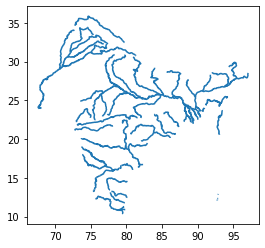

In [99]:
indian_river = rivers[rivers.intersects(indian_shape)]
indian_river.plot()

<AxesSubplot:>

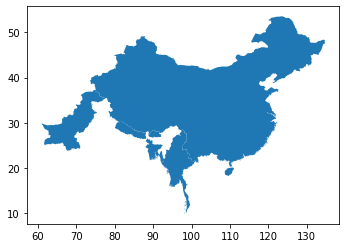

In [100]:
Neighbours_India = countries[countries.touches(indian_shape)]
Neighbours_India.plot()

### Geospatial Operations

Understanding base logic first! Back to `shapely`

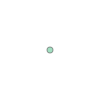

In [102]:
test_point = Point(0,0)
test_point

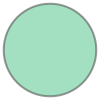

In [103]:
test_point.buffer(10)

In [104]:
test_point.buffer(10).area

313.6548490545939

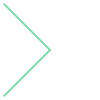

In [109]:
from shapely.geometry import LineString

test_line = LineString([(0, 0), (1, 1), (0, 2)])
test_line

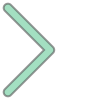

In [113]:
#Buffer puts original geometry at center and create buffer alongside
test_line.buffer(0.1)

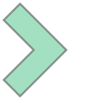

In [112]:
#We can also put geometry on either side ( Positive value will put buffer to left)

test_line.buffer(0.5, single_sided=True)

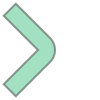

In [115]:
#We can also put geometry on either side ( negative value will put buffer to right)

test_line.buffer(-0.5, single_sided=True)

Operations on `geopandas`

In [117]:
Indian_cities =  places[places.within(indian_shape)]

In [120]:
Indian_cities

,id,geom,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,changed,namediff,diffnote,pop_max,pop_min,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,max_pop10,max_pop20,max_pop50,max_pop300,max_pop310,max_natsca,min_areakm,max_areakm,min_areami,max_areami,min_perkm,max_perkm,min_permi,...,un_fid,un_adm0,un_lat,un_long,pop1950,pop1955,pop1960,pop1965,pop1970,pop1975,pop1980,pop1985,pop1990,pop1995,pop2000,pop2005,pop2010,pop2015,pop2020,pop2025,pop2050,cityalt,min_zoom,wikidataid,wof_id,capalt,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id
561,561,POINT (73.81800 15.49200),9,5,1,Admin-1 capital,Panaji,None,None,0,Panaji,0.0,None,0.0,0,India,IND,India,IND,Goa,IN,None,15.491997,73.818001,4.0,1,Added missing admin-1 capital. Population from...,65586,65586,0,8,8,1260607.0,None,None,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q214681,102029109,0,Panjim,Panaji,Panaji,Panaji,Pangim,Панаджи,帕纳吉,None,بانجيم,পানাজি,Πάντζιμ,पणजी,Panadzsi,Panaji,Panaji,パナジ,파나지,Panaji,Panaji,Panaji,Panaji,Panaji,4,1159122667
1365,1353,POINT (77.16660 31.10003),8,10,1,Admin-1 capital,Simla,None,Shimla,0,Simla,0.0,None,0.0,0,India,IND,India,IND,Himachal Pradesh,IN,None,31.100025,77.166597,1.0,1,Added place. Population from GeoNames.,173503,173503,0,9,9,1256237.0,None,None,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q83786,102028631,0,Shimla,Shimla,Shimla,Shimla,Shimla,Шимла,西姆拉,None,شيملا,শিমলা,Σίμλα,शिमला,Simlá,Shimla,Shimla,シムラー,심라,Shimla,Shimla,Shimla,Shimla,Shimla,4,1159130425
1366,1354,POINT (77.01999 28.45001),8,10,1,Populated place,Gurgaon,None,None,0,Gurgaon,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.450006,77.019991,0.0,0,None,197340,197340,3212622,9,9,1270642.0,None,Gurgaon,1,0,3377995.0,0.0,0.0,0.0,0.0,10.0,3440.0,3440.0,1328.0,1328.0,2493.0,2493.0,1549.0,...,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q238508,102030161,0,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Гургаон,古爾岡,None,جورجاون,গুড়গাঁও,Γκούργκαον,गुडगाँव,Gurgáon,Gurgaon,Gurgaon,グルガーオン,구르가온,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Gurgaon,4,1159130429
1367,1355,POINT (77.01999 29.00000),8,10,1,Populated place,Sonipat,None,None,0,Sonipat,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.999999,77.019991,0.0,0,None,250521,250521,1711294,10,10,1255744.0,None,Sonipat,1,0,1788816.0,0.0,0.0,0.0,0.0,10.0,1801.0,1801.0,695.0,695.0,983.0,983.0,611.0,...,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q41561,102028575,0,Sonipat,Sonipat,Sonipat,Sonipat,Sonipat,Сонипат,索尼帕特,None,سونيبات,সোনিপাত,None,सोनीपत,Sonipat,None,Sonipat,ソーニーパト,소니파트,Sonipat,Sonipat,Sonipat,Sonipat,Sonipat,4,1159130433
1368,1356,POINT (76.58002 28.90000),8,10,1,Populated place,Rohtak,None,None,0,Rohtak,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.900005,76.580018,0.0,0,None,317245,317245,1708277,10,10,1258076.0,None,Rohtak,1,0,1758925.0,0.0,0.0,0.0,0.0,10.0,1953.0,1953.0,754.0,754.0,2432.0,2432.0,1511.0,...,0,None,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q1453180,102028805,0,Rohtak,Rohtak,Rohtak,Rohtak,Rohtak,Рохтак,罗赫塔克,None,روهتاك,রোহতক,Ρόχτακ,रोहतक,None,Rohtak,Rohtak,ロータク,롯탁,Rohtak,Rohtak,Rohtak,Rohtak,Rohtak,4,1159130437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [121]:
Indian_cities_m = Indian_cities.to_crs(3857)

In [122]:
Indian_cities_m.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [125]:
Indian_cities_m.head()

,id,geom,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,diffascii,nameascii,adm0cap,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,changed,namediff,diffnote,pop_max,pop_min,pop_other,rank_max,rank_min,geonameid,meganame,ls_name,ls_match,checkme,max_pop10,max_pop20,max_pop50,max_pop300,max_pop310,max_natsca,min_areakm,max_areakm,min_areami,max_areami,min_perkm,max_perkm,min_permi,...,un_fid,un_adm0,un_lat,un_long,pop1950,pop1955,pop1960,pop1965,pop1970,pop1975,pop1980,pop1985,pop1990,pop1995,pop2000,pop2005,pop2010,pop2015,pop2020,pop2025,pop2050,cityalt,min_zoom,wikidataid,wof_id,capalt,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id
561,561,POINT (8217382.244 1745967.061),9,5,1,Admin-1 capital,Panaji,None,None,0,Panaji,0.0,None,0.0,0,India,IND,India,IND,Goa,IN,None,15.491997,73.818001,4.0,1,Added missing admin-1 capital. Population from...,65586,65586,0,8,8,1260607.0,None,None,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q214681,102029109,0,Panjim,Panaji,Panaji,Panaji,Pangim,Панаджи,帕纳吉,None,بانجيم,পানাজি,Πάντζιμ,पणजी,Panadzsi,Panaji,Panaji,パナジ,파나지,Panaji,Panaji,Panaji,Panaji,Panaji,4,1159122667
1365,1353,POINT (8590146.289 3645746.177),8,10,1,Admin-1 capital,Simla,None,Shimla,0,Simla,0.0,None,0.0,0,India,IND,India,IND,Himachal Pradesh,IN,None,31.100025,77.166597,1.0,1,Added place. Population from GeoNames.,173503,173503,0,9,9,1256237.0,None,None,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q83786,102028631,0,Shimla,Shimla,Shimla,Shimla,Shimla,Шимла,西姆拉,None,شيملا,শিমলা,Σίμλα,शिमला,Simlá,Shimla,Shimla,シムラー,심라,Shimla,Shimla,Shimla,Shimla,Shimla,4,1159130425
1366,1354,POINT (8573826.180 3305828.675),8,10,1,Populated place,Gurgaon,None,None,0,Gurgaon,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.450006,77.019991,0.0,0,None,197340,197340,3212622,9,9,1270642.0,None,Gurgaon,1,0,3377995.0,0.0,0.0,0.0,0.0,10.0,3440.0,3440.0,1328.0,1328.0,2493.0,2493.0,1549.0,...,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q238508,102030161,0,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Гургаон,古爾岡,None,جورجاون,গুড়গাঁও,Γκούργκαον,गुडगाँव,Gurgáon,Gurgaon,Gurgaon,グルガーオン,구르가온,Gurgaon,Gurgaon,Gurgaon,Gurgaon,Gurgaon,4,1159130429
1367,1355,POINT (8573826.180 3375645.856),8,10,1,Populated place,Sonipat,None,None,0,Sonipat,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.999999,77.019991,0.0,0,None,250521,250521,1711294,10,10,1255744.0,None,Sonipat,1,0,1788816.0,0.0,0.0,0.0,0.0,10.0,1801.0,1801.0,695.0,695.0,983.0,983.0,611.0,...,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q41561,102028575,0,Sonipat,Sonipat,Sonipat,Sonipat,Sonipat,Сонипат,索尼帕特,None,سونيبات,সোনিপাত,None,सोनीपत,Sonipat,None,Sonipat,ソーニーパト,소니파트,Sonipat,Sonipat,Sonipat,Sonipat,Sonipat,4,1159130433
1368,1356,POINT (8524848.593 3362925.019),8,10,1,Populated place,Rohtak,None,None,0,Rohtak,0.0,None,0.0,0,India,IND,India,IND,Haryana,IN,None,28.900005,76.580018,0.0,0,None,317245,317245,1708277,10,10,1258076.0,None,Rohtak,1,0,1758925.0,0.0,0.0,0.0,0.0,10.0,1953.0,1953.0,754.0,754.0,2432.0,2432.0,1511.0,...,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,7.0,Q1453180,102028805,0,Rohtak,Rohtak,Rohtak,Rohtak,Rohtak,Рохтак,罗赫塔克,None,روهتاك,রোহতক,Ρόχτακ,रोहतक,None,Rohtak,Rohtak,ロータク,롯탁,Rohtak,Rohtak,Rohtak,Rohtak,Rohtak,4,1159130437


In [128]:
city_buffer = Indian_cities_m[['geom','name']]
city_buffer

,geom,name
561,POINT (8217382.244 1745967.061),Panaji
1365,POINT (8590146.289 3645746.177),Simla
1366,POINT (8573826.180 3305828.675),Gurgaon
1367,POINT (8573826.180 3375645.856),Sonipat
1368,POINT (8524848.593 3362925.019),Rohtak
...,...,...
7216,POINT (8108299.486 2415972.887),Surat
7263,POINT (8593862.465 3324835.758),New Delhi
7264,POINT (8633724.176 1456526.778),Bangalore
7295,POINT (8110186.337 2157165.477),Mumbai


<AxesSubplot:>

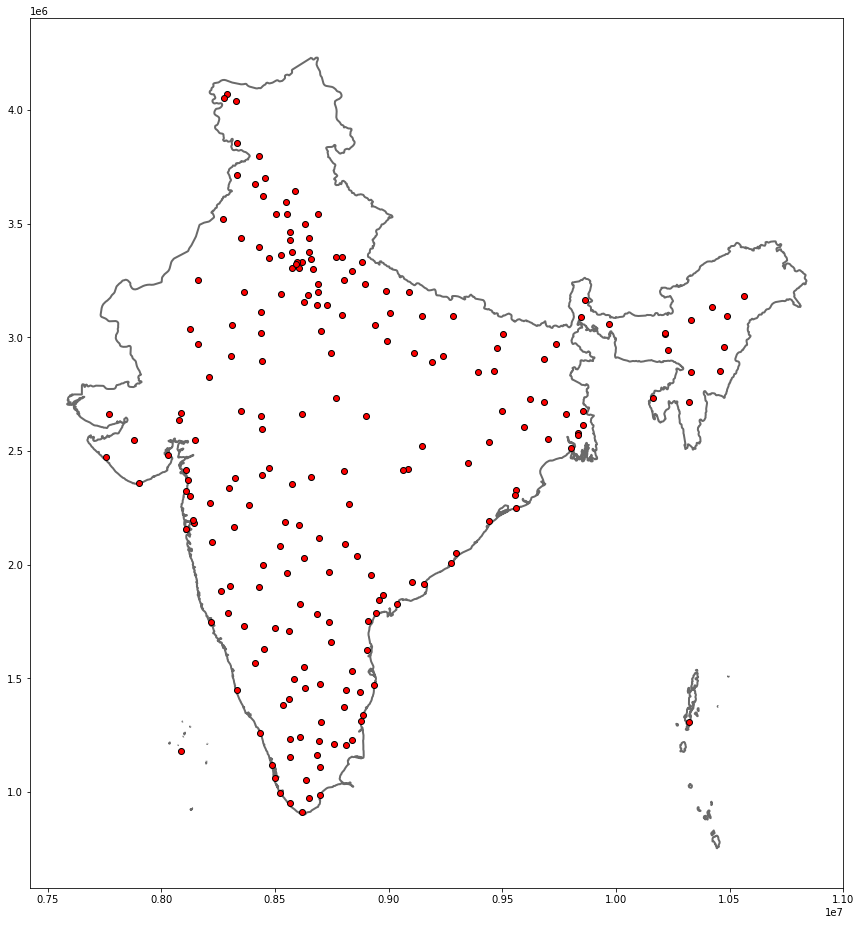

In [142]:
fig, ax = plt.subplots(figsize=(16, 16))
India_m.plot(ax=ax, color='#ffffff', edgecolor='#6a6a6a', linewidth=2)
city_buffer.plot(ax=ax, color='#f00', edgecolor='#000000')


In [144]:
city_buffer['geom'] = city_buffer.buffer(50000)

/Users/krishnaglodha/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [145]:
city_buffer

,geom,name
561,"POLYGON ((8267382.244 1745967.061, 8267141.480...",Panaji
1365,"POLYGON ((8640146.289 3645746.177, 8639905.526...",Simla
1366,"POLYGON ((8623826.180 3305828.675, 8623585.416...",Gurgaon
1367,"POLYGON ((8623826.180 3375645.856, 8623585.416...",Sonipat
1368,"POLYGON ((8574848.593 3362925.019, 8574607.830...",Rohtak
...,...,...
7216,"POLYGON ((8158299.486 2415972.887, 8158058.723...",Surat
7263,"POLYGON ((8643862.465 3324835.758, 8643621.701...",New Delhi
7264,"POLYGON ((8683724.176 1456526.778, 8683483.413...",Bangalore
7295,"POLYGON ((8160186.337 2157165.477, 8159945.574...",Mumbai


In [159]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,None,Chile,CL,Republic of Chile,None,Chile,None,None,Chile,None,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,Bolivia,None,None,Bolivia,None,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,None,Peru,PE,Republic of Peru,None,Peru,None,None,Peru,None,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-99,South America,Americas,South America,Latin A

In [168]:
countries_centroid = countries[['geometry','NAME','CONTINENT']]
countries_centroid.head()

,geometry,NAME,CONTINENT
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,Asia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,Asia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,South America
3,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,South America
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,South America


In [160]:
countries_centroid['geometry'] = countries_centroid['geometry'].centroid
countries_centroid.head()

<ipython-input-160-1b2503076a23>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries_centroid['geometry'] = countries_centroid['geometry'].centroid
/Users/krishnaglodha/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,geometry,NAME
0,POINT (117.27043 -2.22296),Indonesia
1,POINT (109.69887 3.79239),Malaysia
2,POINT (-71.36437 -37.74361),Chile
3,POINT (-64.68475 -16.70688),Bolivia
4,POINT (-74.37806 -9.15439),Peru


<AxesSubplot:>

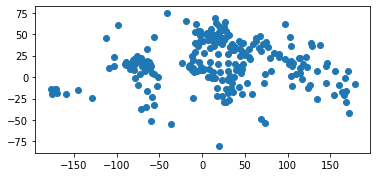

In [161]:
countries_centroid.plot()

In [162]:
countries['area'] = countries['geometry'].area
countries.head()

<ipython-input-162-0728f2abdd05>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries['geometry'].area


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,WIKIPEDIA,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,area
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,IDN,0,Indonesia,Indonesia,IDN,Indonesia,None,Indo.,INDO,Republic of Indonesia,None,Indonesia,None,None,Indonesia,None,6,6,6,11,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,-99,ID,ID,IDN,IDN,360,360,ID,IDN,23424846,23424846,Exact WOE match as country,IDN,IDN,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,9,9,5,-99,1,0.0,1.7,6.7,1159320845,Q252,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",153.078608
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,MYS,0,Malaysia,Malaysia,MYS,Malaysia,None,Malay.,MY,Malaysia,None,Malaysia,None,None,Malaysia,None,2,4,3,6,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,-99,MY,MY,MYS,MYS,458,458,MY,MYS,23424901,23424901,Exact WOE match as country,MYS,MYS,-99,-99,Asia,Asia,South-Eastern Asia,East Asia & Pacific,8,8,6,-99,1,0.0,3.0,8.0,1159321083,Q833,ماليزيا,মালয়েশিয়া,Malaysia,Malaysia,Malasia,Malaisie,Μαλαισία,मलेशिया,Malajzia,Malaysia,Malesia,マレーシア,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",26.703172
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,0,Chile,CHL,0,Chile,CHL,0,Chile,Chile,CHL,Chile,None,Chile,CL,Republic of Chile,None,Chile,None,None,Chile,None,5,1,5,9,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,-99,CI,CL,CHL,CHL,152,152,CL,CHL,23424782,23424782,Exact WOE match as country,CHL,CHL,-99,-99,South America,Americas,South America,Latin America & Caribbean,5,5,5,-99,1,0.0,1.7,6.7,1159320493,Q298,تشيلي,চিলি,Chile,Chile,Chile,Chili,Χιλή,चिली,Chile,Chili,Cile,チリ,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",76.761813
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,BOL,0,Bolivia,Bolivia,BOL,Bolivia,None,Bolivia,BO,Plurinational State of Bolivia,None,Bolivia,None,None,Bolivia,None,1,5,2,3,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,-99,BL,BO,BOL,BOL,068,068,BO,BOL,23424762,23424762,Exact WOE match as country,BOL,BOL,-99,-99,South America,Americas,South America,Latin America & Caribbean,7,7,7,-99,1,0.0,3.0,7.5,1159320439,Q750,بوليفيا,বলিভিয়া,Bolivien,Bolivia,Bolivia,Bolivie,Βολιβία,बोलिविया,Bolívia,Bolivia,Bolivia,ボリビア,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",92.203587
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,0,Peru,PER,0,Peru,PER,0,Peru,Peru,PER,Peru,None,Peru,PE,Republic of Peru,None,Peru,None,None,Peru,None,4,4,4,11,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,-99,PE,PE,PER,PER,604,604,PE,PER,23424919,23424919,Exact WOE match as country,PER,PER,-99,-9

In [52]:
countries_m = countries.to_crs(3857)
countries_m['area'] = (countries_m['geometry'].area)/1000000
countries_m

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry,area
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",1.901567e+06
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",3.317439e+05
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.255936e+06
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-7737827.685 -1979875.500, -7737828....",1.194826e+06
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",1.339975e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Admin-0 country,0,4,China,CH1,1,2,Country,Macao S.A.R,MAC,...,Macau,Makau,Macau,Макао,Macao,Makao,Ma Cao,澳門,"MULTIPOLYGON (((12641286.013 2531110.377, 1264...",3.523370e+01
251,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,Ashmore and Cartier Islands,ATC,...,Ashmore- en Cartiereilanden,Wyspy Ashmore i Cartiera,Ilhas Ashmore e Cartier,Острова Ашмор и Картье,Ashmore- och Cartieröarna,Ashmore ve Cartier Adaları,Quần đảo Ashmore và Cartier,阿什莫尔和卡捷岛,"POLYGON ((13758756.865 -1394492.973, 13758838....",2.843784e+00
252,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,Bajo Nuevo Bank (Petrel Is.),BJN,...,Bajo Nuevo,Bajo Nuevo,Ilha Baixo Novo,Бахо-Нуэво,Bajo Nuevo,Bajo Nuevo Bank,Bajo Nuevo Bank,巴霍努埃沃礁,"POLYGON ((-8904366.797 1780988.794, -8904203.7...",3.895604e-02
253,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,Serranilla Bank,SER,...,Serranilla,Isla Serranilla,Ilha Serranilla,Серранилья-Банк,Serranilla Bank,Serranilla Bank,Serranilla Bank,塞拉纳浅滩,"POLYGON ((-8753839.074 1788757.197, -8754210.5...",1.144447e-01


## Visualising GeoDataFrame

<AxesSubplot:>

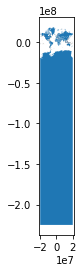

In [166]:
#simple visualisation 
countries_m.plot()

<AxesSubplot:>

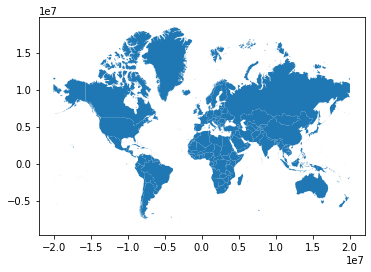

In [167]:
countries_m = countries_m[countries_m['NAME'] != "Antarctica"]
countries_m.plot()

<AxesSubplot:>

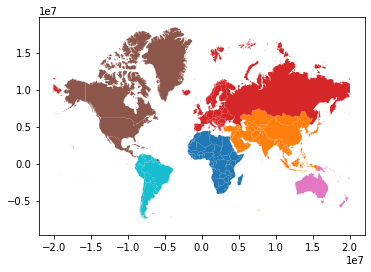

In [169]:
#color based on column
countries_m.plot(column='CONTINENT')

<AxesSubplot:>

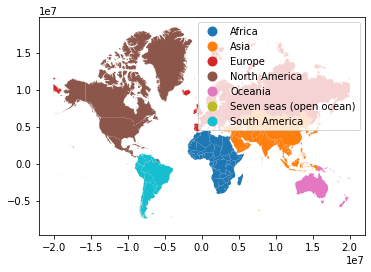

In [171]:
countries_m.plot(column='CONTINENT',legend=True)

In [56]:
fig, ax = plt.subplots(figsize=(16, 16))
countries_m.plot(ax=ax,column='CONTINENT',legend=True)

NameError: name 'plt' is not defined

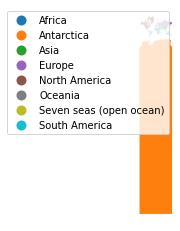

In [55]:
ax = countries_m.plot(column='CONTINENT',legend=True)
ax.set_axis_off()

<AxesSubplot:>

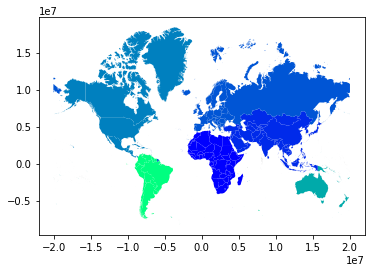

In [174]:
#Checkout available color maps => https://matplotlib.org/2.0.2/users/colormaps.html
countries_m.plot(column='CONTINENT',  cmap='winter')


<AxesSubplot:>

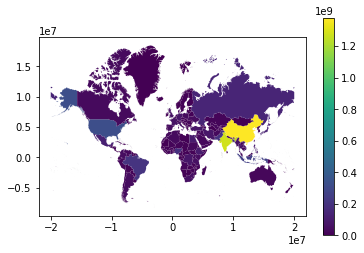

In [208]:
countries_m.plot(column='POP_EST',legend=True)


In [209]:
countries_plot = countries_m[(countries_m['NAME'] != 'India') & (countries_m['NAME'] != 'China')]

<AxesSubplot:>

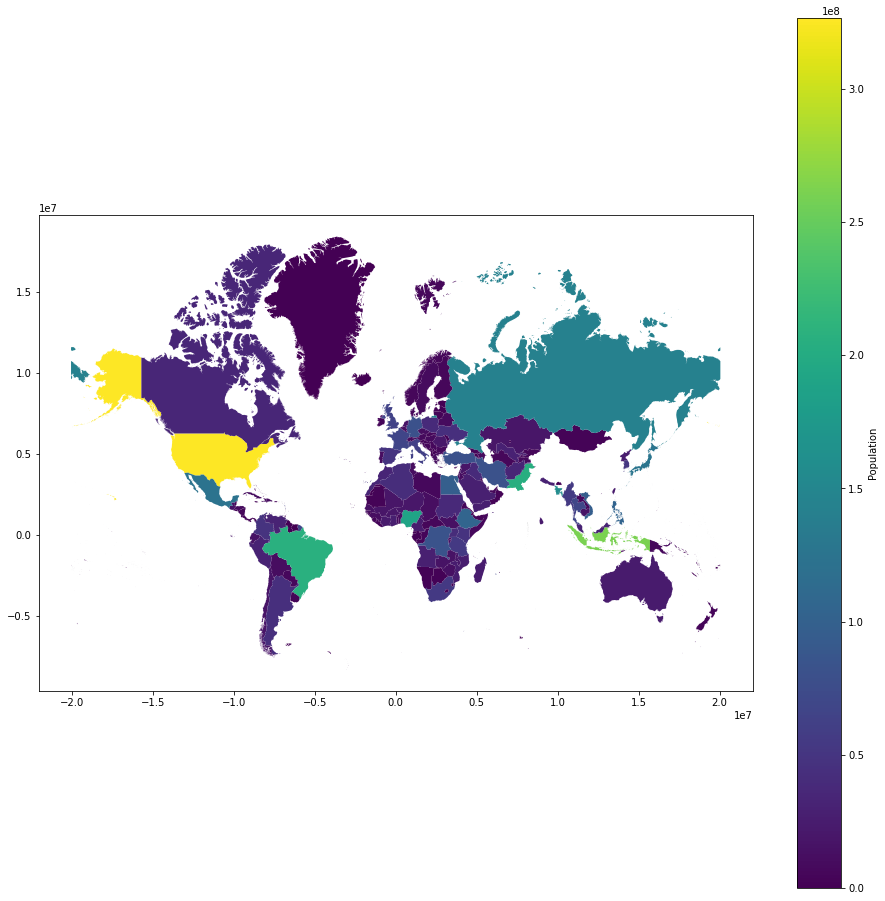

In [212]:
countries_plot.plot(column='POP_EST',legend=True,figsize=(16,16), legend_kwds={'label': 'Population'})

### matplotlib to show multiple data 

<AxesSubplot:>

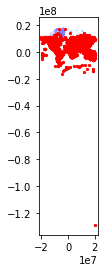

In [184]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m = places.to_crs(3857)
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

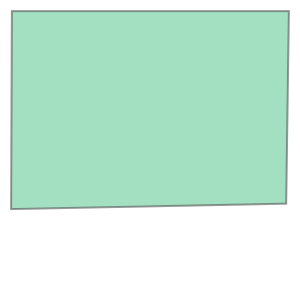

In [177]:
#load world polygon
bbox = gpd.read_file('../data/world.geojson')
world = bbox.loc[0].geometry
world

In [182]:
cities_m = cities_m[cities_m.within(world)]

<AxesSubplot:>

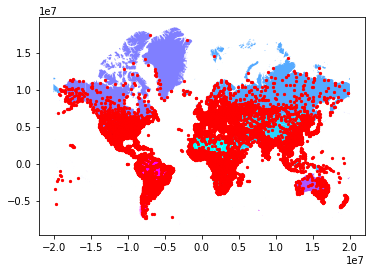

In [183]:
basemap = countries_m.plot(column='CONTINENT', cmap='cool')
cities_m.plot(ax=basemap, marker='o', color='red', markersize=5)

### geopandas overlay to show multiple data 

<AxesSubplot:>

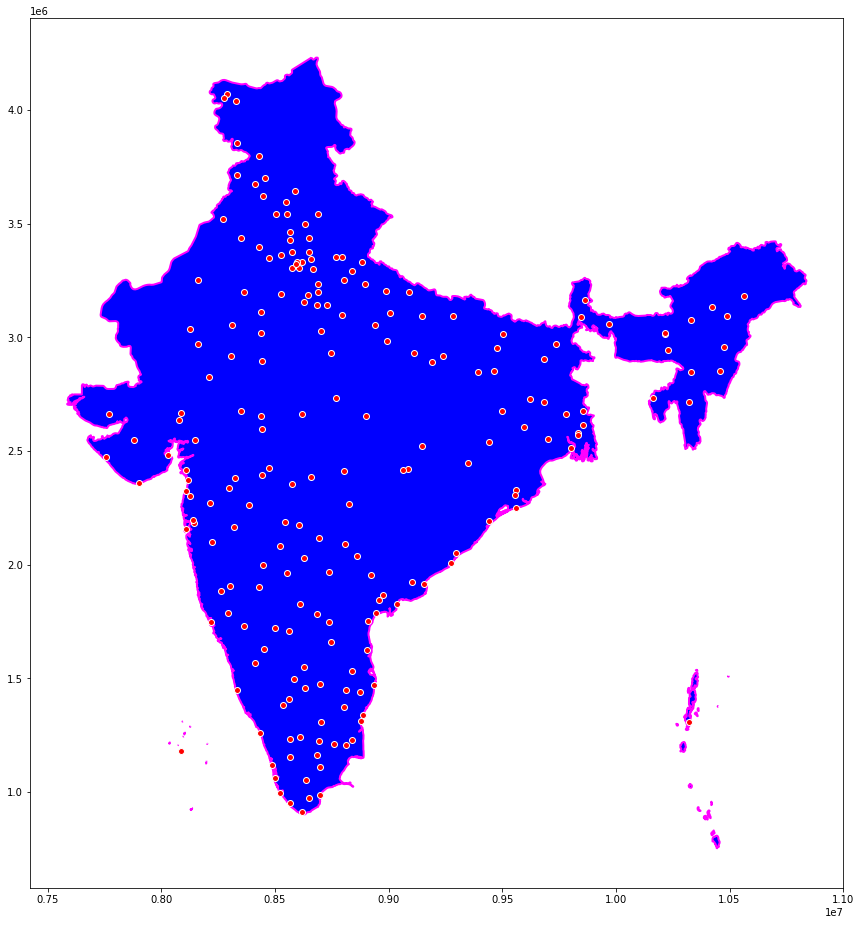

In [195]:
fig, ax = plt.subplots(figsize=(16, 16))

India_m.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
Indian_cities_m.plot(ax=ax, color='r', edgecolor='#fff')


In [197]:
Indian_cities_m['geom'] = Indian_cities_m['geom'].buffer(50000)

<AxesSubplot:>

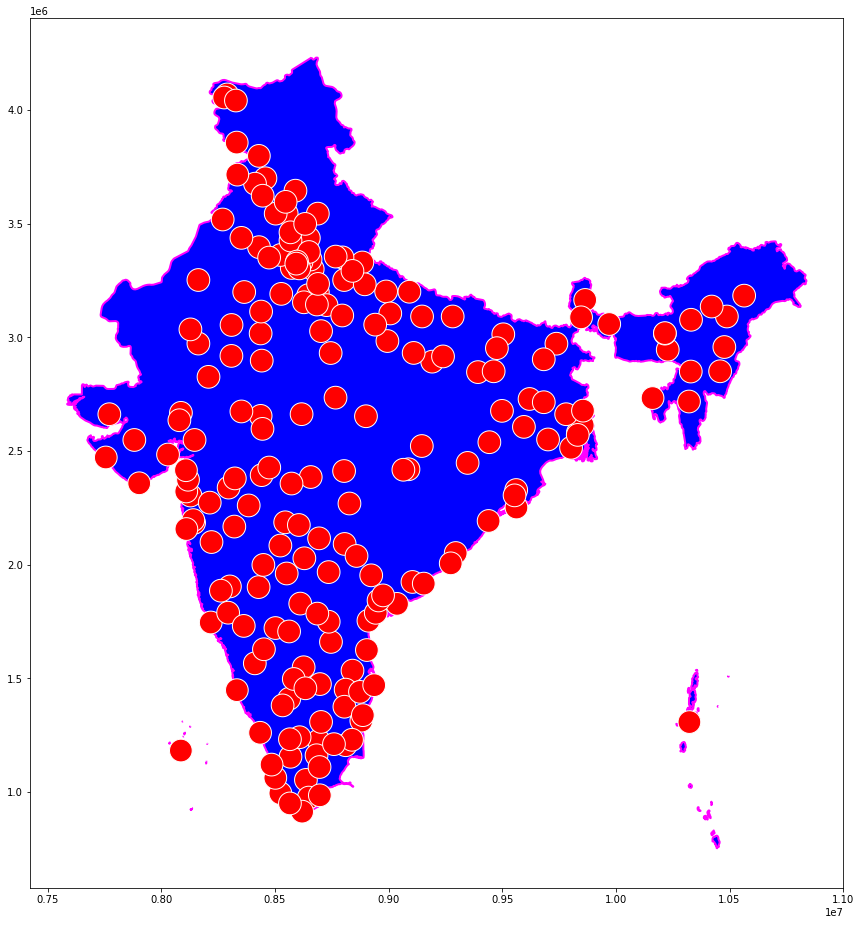

In [198]:
fig, ax = plt.subplots(figsize=(16, 16))

India_m.plot(ax=ax, color='b', edgecolor='#f0f', linewidth=2)
Indian_cities_m.plot(ax=ax, color='r', edgecolor='#fff')

<AxesSubplot:>

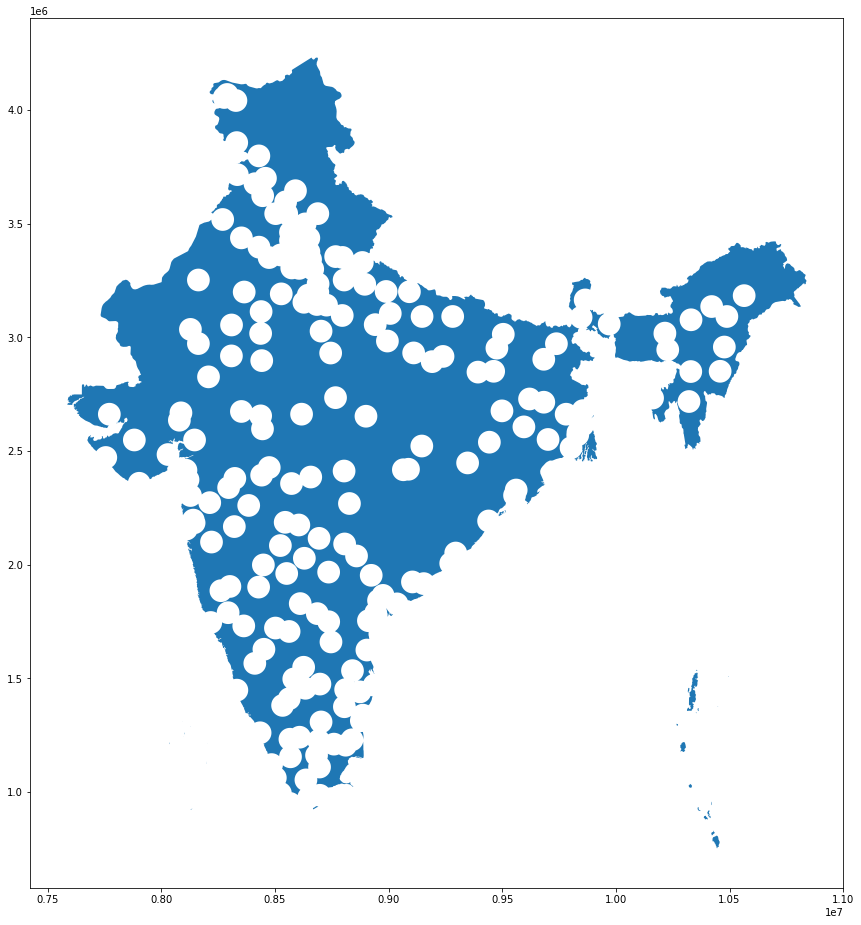

In [203]:
non_rural_area = gpd.overlay(India_m, Indian_cities_m, how='difference')
non_rural_area.plot(figsize=(16, 16))

## Interactive Maps in python

In [1]:
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import geopandas as gpd 


## Loading empty Map

This will include initiating map with center, zoom level and basemap choice. 
Checkout available basemap options at : https://ipyleaflet.readthedocs.io/en/latest/api_reference/basemaps.html?highlight=basemap

In [3]:
m = Map(center=(27,71), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)
m

Map(center=[27, 71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

## Loading Data to Map

### 1. Loading Geopandas dataframe

In [4]:

m = Map(center=(27,71), zoom = 3, basemap= basemaps.Stamen.Toner)
cities = gpd.read_file('../data/ne_10m_populated_places/ne_10m_populated_places.shp')
cities_data  = GeoData(geo_dataframe = cities,
    style={'color': 'black', 'radius':4, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')
m.add_layer(cities_data)
m

Map(center=[27, 71], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

### 2. Loading WMS layer


In [5]:
from ipyleaflet import Map, WMSLayer, basemaps

wms = WMSLayer(
    url='https://ahocevar.com/geoserver/wms',
    layers='topp:states',
    format='image/png',
    transparent=True,
    attribution='Made for GeoPython 2021'
)

m = Map(basemap=basemaps.CartoDB.Positron, center=(38.491, -95.712), zoom=4)

m.add_layer(wms)

m

Map(center=[38.491, -95.712], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

## Adding Popup 

### 1. Adding static popup

In [10]:
from ipywidgets import HTML
from ipyleaflet import Map, Marker, Popup
center = (19.975040, 73.763190)
m = Map(center=center, zoom=17, close_popup_on_click=False)
marker = Marker(location=(19.975040, 73.763190))
m.add_layer(marker)
message2 = HTML()
message2.value = "Hey!! I'm speaking at foss4g 2021 🔥"
marker.popup = message2
m

Map(center=[19.97504, 73.76319], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_…

### 2. Using Custom data for popup

For this example we'll prepare map of following scenario
Seeing all the cities as a point on map and on click show their name

In [7]:
#Preparing data 
all_cities = gpd.read_file('../data/ne_10m_populated_places/ne_10m_populated_places.shp')
all_countries =  gpd.read_file('../data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
all_cities.dropna(subset=["NAME","geometry"])
India = all_countries[all_countries['NAME'] == 'India']
Indian_cities = all_cities[all_cities.within(India.squeeze().geometry)]
Indian_cities

# Creating Map
from ipyleaflet import Map, Marker, Popup
from ipywidgets import HTML
center = (33.762918,68.637469)
m = Map(center=center, zoom=3, close_popup_on_click=False)

# Adding data as marker 
for index, row in Indian_cities.iterrows():
    message2 = HTML()
    marker = Marker(location=(row['geometry'].y, row['geometry'].x))
    message2.value = row['NAME']
    # message2.description = row['NAME']
    marker.popup = message2
    m.add_layer(marker)
#     print(index)

#load map
m

Map(center=[33.762918, 68.637469], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoo…

## Another interesting map options

1. AntPath 
2. Marker Cluster
3. Heatmap
4. Velocity
5. Choropleth

check out out at https://ipyleaflet.readthedocs.io/

## Controls in map

Different Controls can be added to the map to make it more user friendly. Some of such controls are as follows

### 1. Scale control

In [8]:
from ipyleaflet import Map, ScaleControl

m = Map(zoom=15, center=[19.975040, 73.763190])
m.add_control(ScaleControl(position='bottomleft'))

m

Map(center=[19.97504, 73.76319], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

### 2. Split Map

In [9]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl

m = Map(zoom=15, center=[19.975040, 73.763190])

right_layer = basemap_to_tiles( basemaps.Stamen.Toner)
left_layer = basemap_to_tiles(basemaps.CartoDB.Positron)

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(center=[19.97504, 73.76319], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

### Apart from these, some of the most widely used controls are

1. Draw on map
2. Adding Legends
3. Measure, etc. 

You can find all available controls at https://ipyleaflet.readthedocs.io/en/latest/index.html (Look for control section)